In [1]:
import seaborn as sns
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from adjustText import adjust_text
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


df_US = df[(df['job_country']=='United States')].copy()



In [2]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [3]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [4]:
type(df_skills_count)

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending = False, inplace = True)



In [5]:

type(df_skills_count)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3]) #slicer to get the first 3 values from the list

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

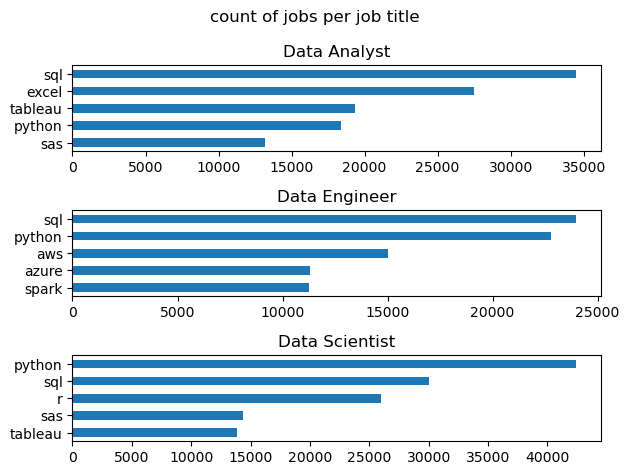

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, jobtitle in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==jobtitle].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=jobtitle)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
fig.suptitle('count of jobs per job title')
plt.tight_layout()

plt.show()


In [8]:
df_job_title_count =df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [9]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')
df_skills_percent['skill_percent']= (df_skills_percent['skill_count']/df_skills_percent['jobs_total'])*100
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


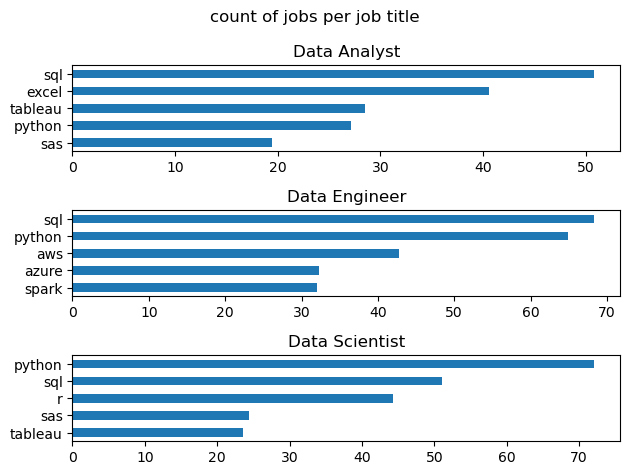

In [10]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, jobtitle in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short']==jobtitle].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=jobtitle)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
fig.suptitle('count of jobs per job title')
plt.tight_layout()

plt.show()

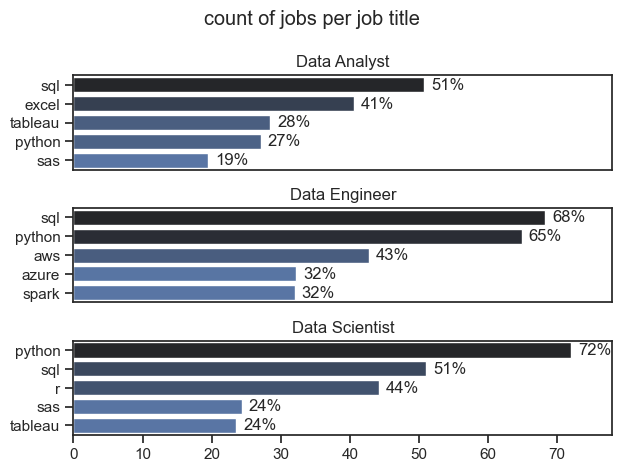

In [14]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style ='ticks')

for i, jobtitle in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short']==jobtitle].head()
    sns.barplot(data= df_plot, y='job_skills', x='skill_percent',ax = ax[i],  hue='skill_count', palette = 'dark:b_r')
    ax[i].set_title(jobtitle)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)
    ax[i].legend().set_visible(False)
    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v +1,n,f'{v:.0f}%', va='center')
    if i!=len(job_titles)-1:
        ax[i].set_xticks([])
fig.suptitle('count of jobs per job title')
plt.tight_layout()

plt.show()